### 16장 이미지 인식의 꽃, CNN 익히기

#### 1. 데이터 전처리
- X: 불러온 이미지 데이터
- Y_class: X에 0~9까지 붙인 이름표

In [1]:
from keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 34s 3us/step
학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


- 이미지 샘플 하나 불러오기
    - 모든 이미지 X_train에 저장
    - ```imshow()```: 이미지 출력
    - ```cmap = 'Greys'```: 이미지 흑백 출력

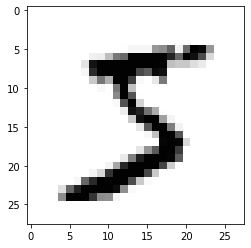

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [3]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


- ```reshape()``` 이미지 2차원 배열 → 1차원 배열   
    - ```reshape(총 샘플 수, 1차원 속성의 수)```

In [4]:
X_train = X_train.reshape(X_train.shape[0], 784)

- 데이터 정규화(Normalization): 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정
    - 케라스: 데이터가 0~1 사이일 때 최적의 성능을 보임
    - 0 ~ 255 사이의 값을 0~1 사이의 값으로 바꾸어야 함
        - 각 값을 255로 나누어야 함
    - ```astype()``` 함수를 이용해 실수형으로 바꾼 뒤 나누어야 함

In [5]:
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [6]:
print("class : %d" % (Y_class_train[0]))

class : 5


- 원-핫 인코딩
    - [5] → [0,0,0,0,0,1,0,0,0,0]
    - ```np_utils.to_categorical(클래스, 클래스의 개수)``` 함수 사용

In [7]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test  = np_utils.to_categorical(Y_class_test,  10)

In [8]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
